# Plotting oscillation amplitude vs. capture time 

Hi! Welcome :) Portions of this code were originally created by Marilena Lykiardopoulou and the rest was created and commented by Annabelle Czihaly.

The goal of this script is to plot time of flight (ToF) vs. time offset for various capture times. We then fit these curves to determine the oscillation amplitude. Finally, we plot the oscillation amplitude vs. capture time. 

Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import optimize

#### define tof resonance

In [2]:
def tof_res(df): 
    
    ToF = []
    counts = []
    x = []
    sigma = []
    time_offset = []
    
    for i in range(0, max(df['x_step_idx'])+1):
        
        df_i = df.loc[df['x_step_idx']==i]
        
        ToF.append(np.average(df_i['tof']))
        sigma.append(np.std(df_i['tof'])) #standard deviation of ToF
        x.append(i)
        counts.append(len(df_i['tof'])) 
        
        # turn df_i['step_value_ppg'] into a list
        # from this list, remove all [] brackets
        # make all values floats
        # get the average of them 
        
        time_offset.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
    return ToF, sigma, x, counts, time_offset

#### define sine function 

In [3]:
def sine(x, a, b, c, d):
    return a * np.sin(b * (x+d)) + c

#### import dataset(s) and fit them with tof resonance function

In [4]:
df_1 = pd.read_csv("run44338.csv") # load data
#df_1 = df.loc[df['tof']<=130] # do a ToF cut if you wish

ToF_1, counts_1, x_1, sigma_1, time_offset_1 = tof_res(df_1) # use tof_Res function defined above

# enter parameters for fit: [amplitude, frequency, off set, phase]
guess_1 = [2, 840, 95, -10] 

params_1, params_covariance_1 = optimize.curve_fit(sine, time_offset_1, ToF_1, guess_1)

print(params_1)
error_1 = np.sqrt(np.diag(params_covariance_1)) # error bars of oscillation amplitude 

[ -2.5122982  766.90682057  97.64418752 -10.62279518]


In [5]:
df_2 = pd.read_csv("run44339.csv") 
#df_2 = df.loc[df['tof']<=130]

ToF_2, counts_2, x_2, sigma_2, time_offset_2 = tof_res(df_2)

guess_2 = [2, 840, 95, -10]
params_2, params_covariance_2 = optimize.curve_fit(sine, time_offset_2, ToF_2, guess_2)

print(params_2)
error_2 = np.sqrt(np.diag(params_covariance_2))

[ -2.25334844 771.21411658  98.08707309 -10.75640041]


In [6]:
df_3 = pd.read_csv("run44340.csv") 
#df_3 = df.loc[df['tof']<=130]

ToF_3, counts_3, x_3, sigma_3, time_offset_3 = tof_res(df_3)

# [amplitude, frequency, off set, phase]
guess_3 = [-1, 740, 94, 2]
params_3, params_covariance_3 = optimize.curve_fit(sine, time_offset_3, ToF_3, guess_3)

print(params_3)
error_3 = np.sqrt(np.diag(params_covariance_3))

[ -1.74033877 965.74150281  95.48643775   1.22734066]


In [7]:
df_4 = pd.read_csv("run44341.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_4, counts_4, x_4, sigma_4, time_offset_4 = tof_res(df_4)

# [amplitude, frequency, off set, phase]
guess_4 = [2, 900, 95, 2]
params_4, params_covariance_4 = optimize.curve_fit(sine, time_offset_4, ToF_4, guess_4)

print(params_4)
error_4 = np.sqrt(np.diag(params_covariance_4))

[   1.59414707 1023.15304481   97.53351335    1.63254495]


In [8]:
df_5 = pd.read_csv("run44342.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_5, counts_5, x_5, sigma_5, time_offset_5 = tof_res(df_5)

# [amplitude, frequency, off set, phase]
guess_5 = [-7, 700, 94, 3]
params_5, params_covariance_5 = optimize.curve_fit(sine, time_offset_5, ToF_5, guess_5)

print(params_5)
error_5 = np.sqrt(np.diag(params_covariance_5))

[   1.52610212 1061.17841142   94.85527225    1.61465582]


In [9]:
df_6 = pd.read_csv("run44343.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_6, counts_6, x_6, sigma_6, time_offset_6 = tof_res(df_6)

# [amplitude, frequency, off set, phase]
guess_6 = [3, 850, 95, 2]
params_6, params_covariance_6 = optimize.curve_fit(sine, time_offset_6, ToF_6, guess_6)

print(params_6)
error_6 = np.sqrt(np.diag(params_covariance_6))

[  2.29276122 920.44137392  93.94087615   1.76446294]


In [10]:
df_7 = pd.read_csv("run44344.csv") 
#df_1 = df.loc[df['tof']<=130]

ToF_7, counts_7, x_7, sigma_7, time_offset_7 = tof_res(df_7)

# [amplitude, frequency, off set, phase]
guess_7 = [3, 850, 95, 2]
params_7, params_covariance_7 = optimize.curve_fit(sine, time_offset_7, ToF_7, guess_7)

print(params_7)
error_7 = np.sqrt(np.diag(params_covariance_7))

[ -0.95831194 879.69106579  94.26269439   1.89832477]


#### plot tof resonance vs. x scan (in this case x scan is time offset)

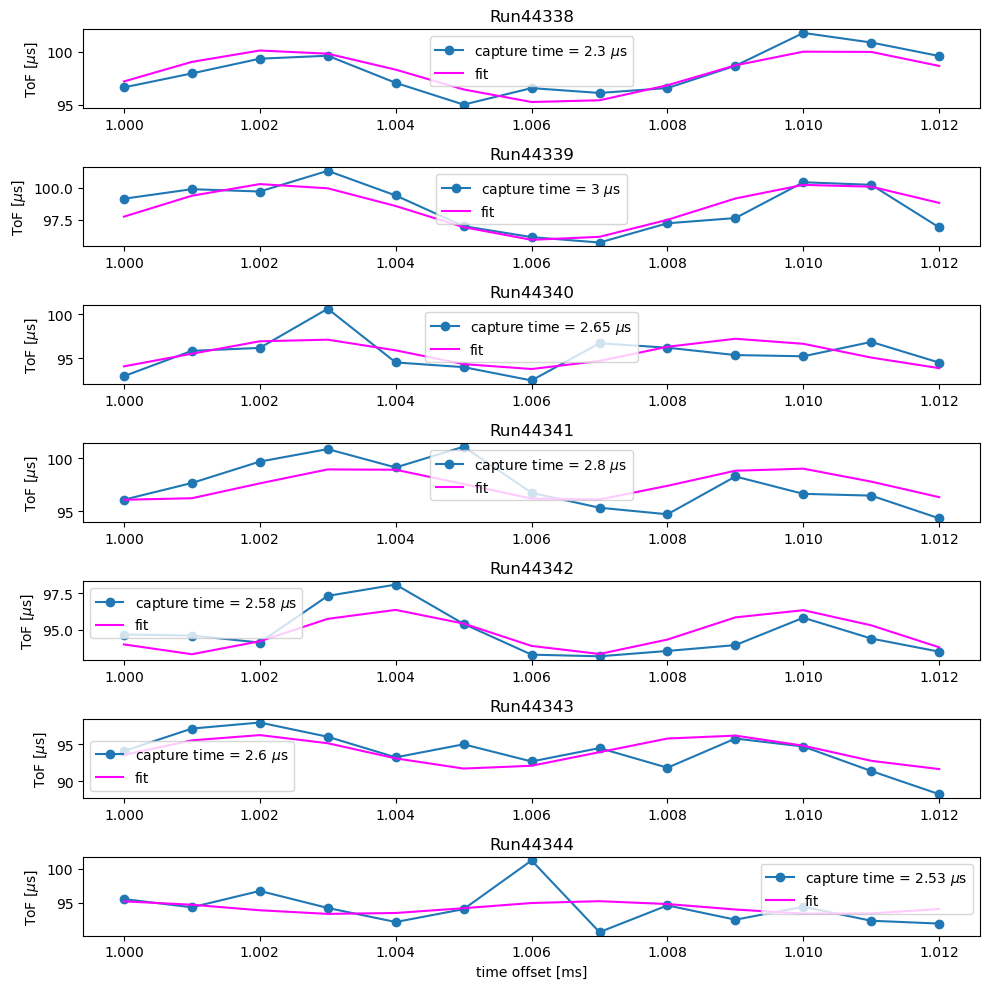

In [11]:
fig, axs = plt.subplots(7, figsize = [10,10])

axs[0].set_title('Run44338')
axs[0].plot(time_offset_1, ToF_1, marker = 'o', label='capture time = 2.3 $\mu$s')
axs[0].plot(time_offset_1, sine(time_offset_1, params_1[0], params_1[1], params_1[2], params_1[3]), label='fit', color='fuchsia')
axs[0].set_ylabel('ToF [$\mu$s]')
axs[0].legend()

axs[1].set_title('Run44339')
axs[1].plot(time_offset_2, ToF_2, marker = 'o', label='capture time = 3 $\mu$s')
axs[1].plot(time_offset_2, sine(time_offset_2, params_2[0], params_2[1], params_2[2], params_2[3]), label='fit', color='fuchsia')
axs[1].set_ylabel('ToF [$\mu$s]')
axs[1].legend()

axs[2].set_title('Run44340')
axs[2].plot(time_offset_3, ToF_3, marker = 'o', label='capture time = 2.65 $\mu$s')
axs[2].plot(time_offset_3, sine(time_offset_3, params_3[0], params_3[1], params_3[2], params_3[3]), label='fit', color='fuchsia')
axs[2].set_ylabel('ToF [$\mu$s]')
axs[2].legend()

axs[3].set_title('Run44341')
axs[3].plot(time_offset_4, ToF_4, marker = 'o', label='capture time = 2.8 $\mu$s')
axs[3].plot(time_offset_4, sine(time_offset_4, params_4[0], params_4[1], params_4[2], params_4[3]), label='fit', color='fuchsia')
axs[3].set_ylabel('ToF [$\mu$s]')
axs[3].legend()

axs[4].set_title('Run44342')
axs[4].plot(time_offset_5, ToF_5, marker = 'o', label='capture time = 2.58 $\mu$s')
axs[4].plot(time_offset_5, sine(time_offset_5, params_5[0], params_5[1], params_5[2], params_5[3]), label='fit', color='fuchsia')
axs[4].set_ylabel('ToF [$\mu$s]')
axs[4].legend()

axs[5].set_title('Run44343')
axs[5].plot(time_offset_6, ToF_6, marker = 'o', label='capture time = 2.6 $\mu$s')
axs[5].plot(time_offset_6, sine(time_offset_6, params_6[0], params_6[1], params_6[2], params_6[3]), label='fit', color='fuchsia')
axs[5].set_ylabel('ToF [$\mu$s]')
axs[5].legend()

axs[6].set_title('Run44344')
axs[6].plot(time_offset_7, ToF_7, marker = 'o', label='capture time = 2.53 $\mu$s')
axs[6].plot(time_offset_7, sine(time_offset_7, params_7[0], params_7[1], params_7[2], params_7[3]), label='fit', color='fuchsia')
axs[6].set_ylabel('ToF [$\mu$s]')
axs[6].set_xlabel('time offset [ms]')
axs[6].legend()

#plt.savefig('Run44338-44344.png', dpi = 200)
plt.tight_layout()

#### plot oscillation amplitude vs. capture time

Text(0.5, 1.0, 'oscillation amplitude vs. capture time')

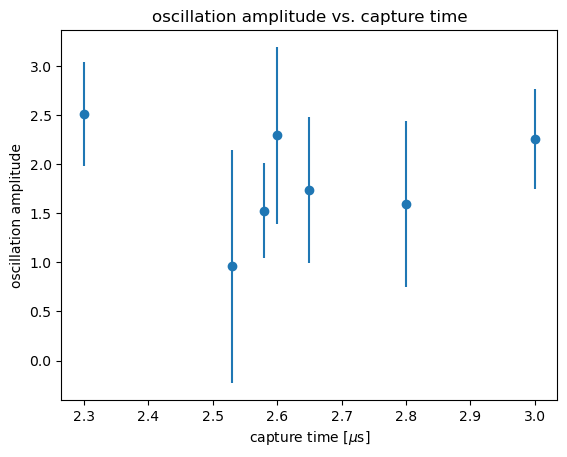

In [15]:
oscillation_amp = [np.abs(params_1[0]), np.abs(params_7[0]), np.abs(params_5[0]), np.abs(params_6[0]), np.abs(params_3[0]), np.abs(params_4[0]), np.abs(params_2[0])]
errors = [error_1[0], error_7[0], error_5[0], error_6[0] , error_3[0], error_4[0], error_2[0]]

capture_time = [2.3, 2.53, 2.58, 2.6, 2.65, 2.8, 3]

plt.errorbar(capture_time, oscillation_amp, errors, marker='o', ls='none')
plt.xlabel('capture time [$\mu$s]')
plt.ylabel('oscillation amplitude')
plt.title('oscillation amplitude vs. capture time')